# 1. Introduction 

## 1.1 Research Question

## 1.2 Metric for Success

# 2. Reading the Data

In [19]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.style.use('bmh')


In [20]:
# Loading the train data

titanic_train = pd.read_csv('/content/train (5).csv')

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Loading our test dataset

titanic_test = pd.read_csv('/content/test (1).csv')

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Checking the Data 

In [22]:
# Checking the shape of the data

print(titanic_train.shape)

print('\n')

print(titanic_test.shape)

(891, 12)


(418, 11)


In [23]:
# Checking information in our datasets

print(titanic_train.info())

print('\n')

print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

# 4. Cleaning the Data 

In [24]:
# Checking for null values

print(titanic_train.isna().sum())

print('\n')

print(titanic_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


> Age, Fare and Embarked attributes have null values. We will only need to deal with the null values in the Age column because we will use it as a feature in our model.

In [25]:
# Dropping Null values in Embarked and Fare

titanic_train.dropna(subset = ['Embarked'], inplace = True)
titanic_test.dropna(subset = ['Fare'], inplace = True)

# Dropping the missing row with missing value in the Fare column

titanic_test.dropna(subset=['Fare'], inplace = True)

In [26]:
# Filling the missing values in the Age feature

titanic_train = titanic_train.fillna(titanic_train['Age'].mean())

titanic_test = titanic_test.fillna(titanic_test['Age'].mean())

In [27]:
# We need to drop the columns that we will not need for our modelling

titanic_train = titanic_train.drop(['Name','Ticket','Cabin','PassengerId'], axis = 1)

titanic_test = titanic_test.drop(['Name','Ticket','Cabin','PassengerId'], axis = 1)

## 5. Feature Engineering

In [28]:
# Previewing the train dataset

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
# Previewing the test dataset

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [30]:
# Label encoding the categorical features

from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

train_encode = ['Sex', 'Embarked']

test_encode = ['Sex', 'Embarked']

for column in train_encode:

  titanic_train[column] = en.fit_transform(titanic_train[column])

for column in test_encode:

  titanic_test[column] = en.fit_transform(titanic_test[column])

In [31]:
# Previewing the train dataset

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [32]:
# Previewing the test dataset

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# 6. Exploratory Data Analysis

We will only be doing Exploratory Data Analysis on the training dataset.

In [33]:
# Describing our data

titanic_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968346,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.642093,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


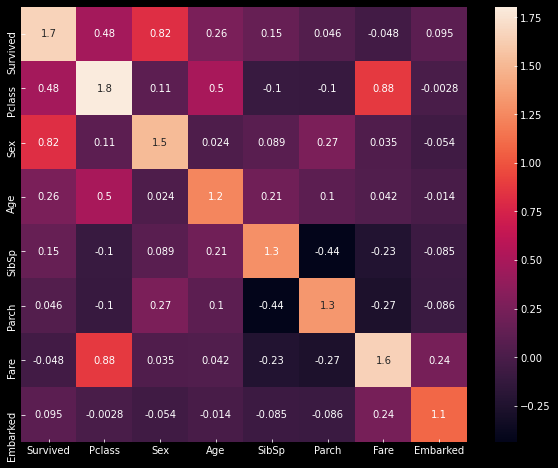

In [36]:
# Checking for correlation 

corr_train = titanic_train.corr()

vif_train = pd.DataFrame(np.linalg.inv(corr_train.values), index = corr_train.index, columns = corr_train.columns)

plt.figure(figsize = (10,8))

sns.heatmap(vif_train, annot = True)


> The VIF of our variables is below 5 so our features are suitable for modelling.

# 7. Modelling

In [37]:
# Extracting features from the dataset

X = titanic_train.drop(['Survived'], axis = 1).values

y = titanic_train['Survived'].values

In [39]:
titanic_train.shape


(889, 8)

## 7.1 Modelling KNN No Splitting

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting the model 

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X, y)

# Using the entire test set to predict

y_pred = classifier.predict(X)

# Evaluating our model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Accuracy score:",accuracy_score(y, y_pred)* 100)

print(confusion_matrix(y, y_pred))

print(classification_report(y, y_pred))

Accuracy score: 81.10236220472441
[[488  61]
 [107 233]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       549
           1       0.79      0.69      0.74       340

    accuracy                           0.81       889
   macro avg       0.81      0.79      0.79       889
weighted avg       0.81      0.81      0.81       889



In [ ]:

test_

# 7. Improving the Model